In [23]:
from pathlib import Path

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, shapiro, ttest_rel, wilcoxon

In [2]:
distance_metric = "mahal"
top_cutoff = 1000
aligner = "mafft"
bats_path = Path("bat_msas").resolve()
others_path = Path("other_msas").resolve()

datasets = [data.stem for data in bats_path.iterdir()]


print(bats_path)

/home/elyalab/Dev/failed_syncs/bat_analysis/bat_msas


In [3]:
indel_params = {
    "data_set": [],
    "insertion_rate_bats": [],
    "deletion_rate_bats": [],
    "insertion_length_bats": [],
    "deletion_length_bats": [],
    "insertion_rate_others": [],
    "deletion_rate_others": [],
    "insertion_length_others": [],
    "deletion_length_others": [],
}

In [7]:
"a" or ["asdf"]

'a'

In [4]:
def read_model_file(file_path: Path):
    model_ = file_path.read_text().splitlines()
    model_ = [line.split(": ") for line in model_[1:]]
    model_ = {key: float(val) for (key,val) in model_}

    model = {}
    model["root_length"] = int(model_.get("Root_length"))
    model["rate_insertion"] = model_.get("R_I") or model_.get("R_ID")
    model["rate_deletion"] = model_.get("R_D") or model_.get("R_ID")
    model["length_param_insertion"] = model_.get("A_I") or model_.get("A_ID")
    model["length_param_deletion"] = model_.get("A_D") or model_.get("A_ID")

    return model



In [8]:
for dataset in sorted(others_path.iterdir()):
    if (model_file := dataset / "model_params.txt").exists():
        print(dataset.stem)
        model = read_model_file(model_file)
        indel_params["data_set"].append(dataset.stem)
        indel_params["insertion_rate_others"].append(model["rate_insertion"])
        indel_params["deletion_rate_others"].append(model["rate_deletion"])
        indel_params["insertion_length_others"].append(model["length_param_insertion"])
        indel_params["deletion_length_others"].append(model["length_param_deletion"])

100129271_NT_AL_AA
100130274_NT_AL_AA
100131017_NT_AL_AA
11095_NT_AL_AA
11173_NT_AL_AA
121006_NT_AL_AA
128061_NT_AL_AA
139378_NT_AL_AA
148870_NT_AL_AA
151649_NT_AL_AA
1539_NT_AL_AA
1609_NT_AL_AA
164592_NT_AL_AA
168090_NT_AL_AA
1816_NT_AL_AA
22994_NT_AL_AA
238_NT_AL_AA
2515_NT_AL_AA
2523_NT_AL_AA
256815_NT_AL_AA
26153_NT_AL_AA
26505_NT_AL_AA
283643_NT_AL_AA
319089_NT_AL_AA
342125_NT_AL_AA
3454_NT_AL_AA
3603_NT_AL_AA
3665_NT_AL_AA
374654_NT_AL_AA
399693_NT_AL_AA
4851_NT_AL_AA
51252_NT_AL_AA
54102_NT_AL_AA
57188_NT_AL_AA
57597_NT_AL_AA
63901_NT_AL_AA
64434_NT_AL_AA
64759_NT_AL_AA
65250_NT_AL_AA
7984_NT_AL_AA
79925_NT_AL_AA
83987_NT_AL_AA
84074_NT_AL_AA
84689_NT_AL_AA
84886_NT_AL_AA
90381_NT_AL_AA
91752_NT_AL_AA


In [9]:
for dataset in sorted(bats_path.iterdir()):
    model_file = dataset / "model_params.txt"
    if (others_path / dataset.stem / "model_params.txt").exists():
        print(dataset.stem)
        model = read_model_file(model_file)
        indel_params["insertion_rate_bats"].append(model["rate_insertion"])
        indel_params["deletion_rate_bats"].append(model["rate_deletion"])
        indel_params["insertion_length_bats"].append(model["length_param_insertion"])
        indel_params["deletion_length_bats"].append(model["length_param_deletion"])

100129271_NT_AL_AA
100130274_NT_AL_AA
100131017_NT_AL_AA
11095_NT_AL_AA
11173_NT_AL_AA
121006_NT_AL_AA
128061_NT_AL_AA
139378_NT_AL_AA
148870_NT_AL_AA
151649_NT_AL_AA
1539_NT_AL_AA
1609_NT_AL_AA
164592_NT_AL_AA
168090_NT_AL_AA
1816_NT_AL_AA
22994_NT_AL_AA
238_NT_AL_AA
2515_NT_AL_AA
2523_NT_AL_AA
256815_NT_AL_AA
26153_NT_AL_AA
26505_NT_AL_AA
283643_NT_AL_AA
319089_NT_AL_AA
342125_NT_AL_AA
3454_NT_AL_AA
3603_NT_AL_AA
3665_NT_AL_AA
374654_NT_AL_AA
399693_NT_AL_AA
4851_NT_AL_AA
51252_NT_AL_AA
54102_NT_AL_AA
57188_NT_AL_AA
57597_NT_AL_AA
63901_NT_AL_AA
64434_NT_AL_AA
64759_NT_AL_AA
65250_NT_AL_AA
7984_NT_AL_AA
79925_NT_AL_AA
83987_NT_AL_AA
84074_NT_AL_AA
84689_NT_AL_AA
84886_NT_AL_AA
90381_NT_AL_AA
91752_NT_AL_AA


In [10]:
indel_params

{'data_set': ['100129271_NT_AL_AA',
  '100130274_NT_AL_AA',
  '100131017_NT_AL_AA',
  '11095_NT_AL_AA',
  '11173_NT_AL_AA',
  '121006_NT_AL_AA',
  '128061_NT_AL_AA',
  '139378_NT_AL_AA',
  '148870_NT_AL_AA',
  '151649_NT_AL_AA',
  '1539_NT_AL_AA',
  '1609_NT_AL_AA',
  '164592_NT_AL_AA',
  '168090_NT_AL_AA',
  '1816_NT_AL_AA',
  '22994_NT_AL_AA',
  '238_NT_AL_AA',
  '2515_NT_AL_AA',
  '2523_NT_AL_AA',
  '256815_NT_AL_AA',
  '26153_NT_AL_AA',
  '26505_NT_AL_AA',
  '283643_NT_AL_AA',
  '319089_NT_AL_AA',
  '342125_NT_AL_AA',
  '3454_NT_AL_AA',
  '3603_NT_AL_AA',
  '3665_NT_AL_AA',
  '374654_NT_AL_AA',
  '399693_NT_AL_AA',
  '4851_NT_AL_AA',
  '51252_NT_AL_AA',
  '54102_NT_AL_AA',
  '57188_NT_AL_AA',
  '57597_NT_AL_AA',
  '63901_NT_AL_AA',
  '64434_NT_AL_AA',
  '64759_NT_AL_AA',
  '65250_NT_AL_AA',
  '7984_NT_AL_AA',
  '79925_NT_AL_AA',
  '83987_NT_AL_AA',
  '84074_NT_AL_AA',
  '84689_NT_AL_AA',
  '84886_NT_AL_AA',
  '90381_NT_AL_AA',
  '91752_NT_AL_AA'],
 'insertion_rate_bats': [0.0410889

In [11]:
comparison_df = pd.DataFrame(indel_params)
comparison_df

,data_set,insertion_rate_bats,deletion_rate_bats,insertion_length_bats,deletion_length_bats,insertion_rate_others,deletion_rate_others,insertion_length_others,deletion_length_others
0,100129271_NT_AL_AA,0.041089,0.041089,1.550061,1.550061,0.046041,0.046041,1.236517,1.236517
1,100130274_NT_AL_AA,0.042010,0.042010,1.188407,1.188407,0.007594,0.035328,1.516307,1.077070
2,100131017_NT_AL_AA,0.016812,0.023271,1.332990,1.276543,0.045270,0.045270,1.053110,1.053110
3,11095_NT_AL_AA,0.010688,0.018824,1.464083,1.306619,0.002017,0.008676,1.571211,1.194831
4,11173_NT_AL_AA,0.036398,0.036398,1.157890,1.157890,0.006885,0.038224,1.584852,1.082209
5,121006_NT_AL_AA,0.007030,0.034775,1.574871,1.137739,0.007242,0.038698,1.505837,1.070211
6,128061_NT_AL_AA,0.007686,0.033603,1.479776,1.177228,0.006537,0.037997,1.590228,1.108003
7,139378_NT_AL_AA,0.008485,0.027278,1.527802,1.183067,0.007694,0.037550,1.643868,1.086754
8,148870_NT_AL_AA,0.042976,0.042976,1.174813,1.174813,0.008420,0.035854,1.611771,1.106897
9,151649_NT_AL_AA,0.037261,0.037261,1.289877,1.289877,0.047413,0.047413,1.191599,1.191599


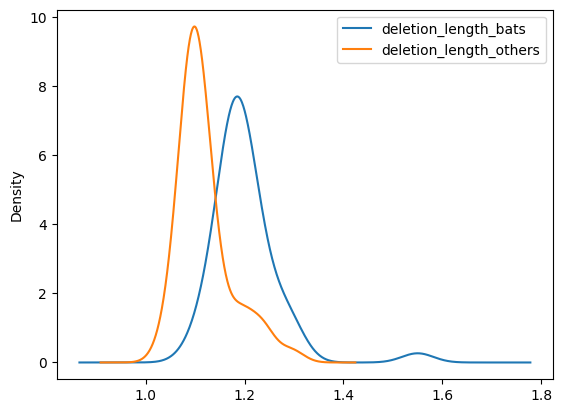

In [ ]:
ax = comparison_df[["insertion_length_bats", "insertion_length_others"]].plot.kde()
# ax.set_ylim(0, 0.1)
# ax.set_xlim(0, 0.1)
# ax.axline((0, 0), slope=1)

In [80]:
shapiro(comparison_df["deletion_length_others"]), shapiro(comparison_df["deletion_length_bats"])

(ShapiroResult(statistic=np.float64(0.8553458358178742), pvalue=np.float64(3.580483237485142e-05)),
 ShapiroResult(statistic=np.float64(0.7575340686398555), pvalue=np.float64(2.0060207841775475e-07)))

In [24]:
wilcoxon(comparison_df["insertion_rate_bats"], comparison_df["insertion_rate_others"])

WilcoxonResult(statistic=np.float64(417.0), pvalue=np.float64(0.1218015068536289))

In [25]:
wilcoxon(comparison_df["deletion_rate_bats"], comparison_df["deletion_rate_others"])

WilcoxonResult(statistic=np.float64(399.0), pvalue=np.float64(0.08169732803560237))

In [69]:
comparison_df.columns

Index(['data_set', 'insertion_rate_bats', 'deletion_rate_bats',
       'insertion_length_bats', 'deletion_length_bats',
       'insertion_rate_others', 'deletion_rate_others',
       'insertion_length_others', 'deletion_length_others'],
      dtype='object')

In [26]:
wilcoxon(comparison_df["insertion_length_bats"], comparison_df["insertion_length_others"])

WilcoxonResult(statistic=np.float64(356.0), pvalue=np.float64(0.027159535011236358))

In [27]:
wilcoxon(comparison_df["deletion_length_bats"], comparison_df["deletion_length_others"])

WilcoxonResult(statistic=np.float64(23.0), pvalue=np.float64(9.094947017729282e-12))

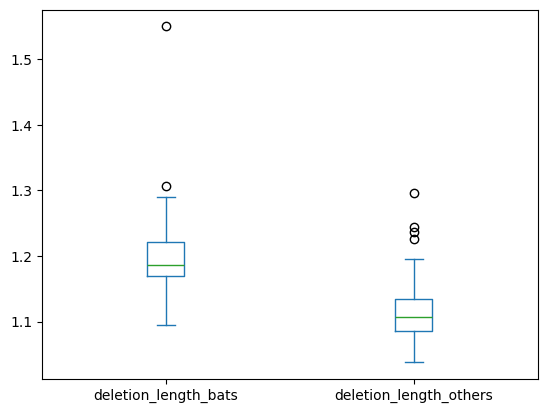

In [ ]:
ax = comparison_df[["deletion_length_bats", "deletion_length_others"]].plot.box()

In [73]:
comparison_df.describe()

,insertion_rate_bats,deletion_rate_bats,insertion_length_bats,deletion_length_bats,insertion_rate_others,deletion_rate_others,insertion_length_others,deletion_length_others
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.021501,0.032367,1.391822,1.201550,0.016676,0.035775,1.478171,1.118999
std,0.015830,0.009443,0.176967,0.068886,0.016451,0.008050,0.213226,0.053244
min,0.001619,0.001981,1.124536,1.094095,0.002017,0.008676,1.037752,1.037752
25%,0.008030,0.028598,1.194163,1.170116,0.006873,0.033523,1.369968,1.085587
50%,0.010688,0.033603,1.479776,1.185869,0.007572,0.036298,1.584825,1.106665
75%,0.039240,0.039240,1.549128,1.221023,0.025691,0.038461,1.622200,1.134435
max,0.044956,0.044956,1.621618,1.550061,0.047413,0.047413,1.665508,1.295287


In [92]:
import shutil
bat_data = Path("chiroptera_data")
bat_data.mkdir(exist_ok=True)

for dataset in indel_params["data_set"]:
    fasta_path: Path = (bats_path / dataset / "alignment.fasta")
    output_path: Path = bat_data / f"{dataset}.fasta"
    shutil.copy(fasta_path, output_path)

    tree_path: Path = (bats_path / dataset / "alignment.tree")
    output_path: Path = bat_data / f"{dataset}.tree"
    shutil.copy(tree_path, output_path)
